<a href="https://colab.research.google.com/github/domywillygithub/Codes/blob/main/PyTorch_MNIST_classification_ACC_%3E_99_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

model_args = {}
# random seed
model_args['seed'] = 123
# we will use batch size of 128 in Stochastic Gradient Descent (SGD) optimization of the network
model_args['batch_size'] = 128 
# learning rate is how fast it will descend
model_args['lr'] = .01
# SGD momentum (default: .5) momentum is a moving average of gradients (it helps to keep direction) 
model_args['momentum'] = .9
# the number of epochs is the number of times you go through the full dataset 
model_args['epochs'] = 10
# logging frequency
model_args['log_interval'] = 100

In [ ]:
# alternatively just download MNIST.tar.gz archive
#!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
#!tar -zxvf MNIST.tar.gz

transform = transforms.Compose([transforms.ToTensor(), 
                              transforms.Normalize((0.1307,), (0.3081,))])
mnist_train = datasets.MNIST('./', train=True, download=True, transform=transform)
# we divide this data into training and validation subsets
train_subset, validation_subset = torch.utils.data.random_split(mnist_train, [50000, 10000])
test_subset = datasets.MNIST('./', train=False, download=False, transform=transform)

In [ ]:
# define dataloaders
loader_kwargs = {'batch_size': model_args['batch_size'], 
                 'num_workers': 1, 
                 'pin_memory': True, 
                 'shuffle': True}
train_loader = torch.utils.data.DataLoader(train_subset, **loader_kwargs)
validation_loader = torch.utils.data.DataLoader(validation_subset, **loader_kwargs)
test_loader = torch.utils.data.DataLoader(test_subset, **loader_kwargs)

50000
10000
10000
391
torch.Size([28, 28])


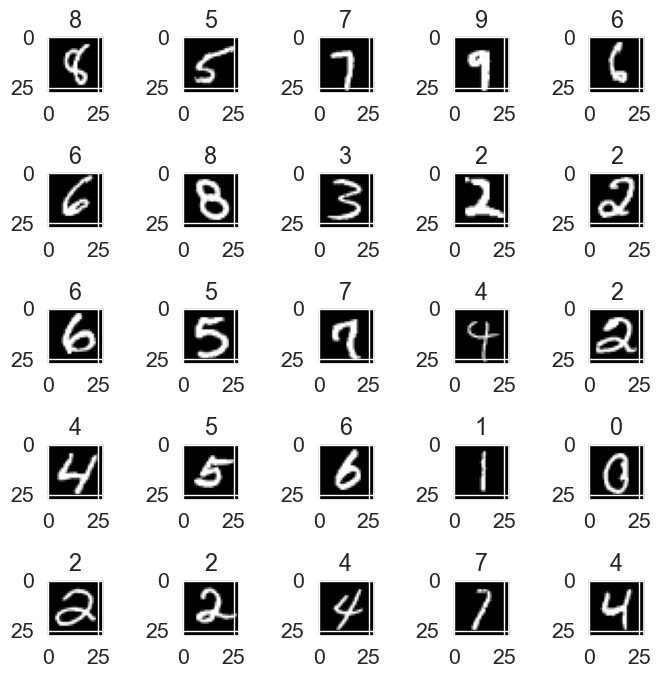

In [ ]:
print(len(train_subset))
print(len(validation_subset))
print(len(test_subset)) # we have data already divided into train & validation & test subsets
print(len(train_loader)) # no of train batches
example_number = 123
print(train_subset[example_number][0][0].shape) # single item shape

fig, axs = plt.subplots(5, 5, figsize=(7,7), tight_layout=True)
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(train_subset[example_number+i*5+j][0].reshape(28,28), cmap='gray')
        axs[i,j].set_title(train_subset[example_number+i*5+j][1])

In [ ]:
class Perceptron(nn.Module):
    # this defines the structure of the Perceptron model
    def __init__(self):
        super(Perceptron, self).__init__()
        # fully connected layer
        self.fc = nn.Linear(28*28, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc(x)
        return F.log_softmax(x, dim=1) # note that dim=0 is the number of samples in batch
    
class Deep(nn.Module):
    def __init__(self):
        super(Deep, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=128)
        self.fc4 = nn.Linear(in_features=128, out_features=64)
        self.fc5 = nn.Linear(in_features=64, out_features=10)

        self.dropout = nn.Dropout(0.2)  # add dropout with probability 0.2

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # flatten the input tensor
        x = F.relu(self.dropout(self.fc1(x)))
        x = F.relu(self.dropout(self.fc2(x)))
        x = F.relu(self.dropout(self.fc3(x)))
        x = F.relu(self.dropout(self.fc4(x)))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)   
    
# original deep model given    

# class Deep(nn.Module):
#     # this defines the structure of the Perceptron model
#     def __init__(self):
#         super(Deep, self).__init__()
#         # fully connected layers
#         self.fc1 = nn.Linear(28*28, 20)
#         self.fc2 = nn.Linear(20, 10)

#     def forward(self, x):
#         x = x.view(-1, 28*28)
#         x = self.fc1(x)
#         x = F.relu(x)
#         # hidden layer
#         x = self.fc2(x)
#         return F.log_softmax(x, dim=1) # note that dim=0 is the number of samples in batch

    
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=3, padding=1) 
        self.bn1 = nn.BatchNorm2d(num_features=128)

        self.tns1 = nn.Conv2d(in_channels=128, out_channels=8, kernel_size=1, padding=1)

        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1) 
        self.bn2 = nn.BatchNorm2d(num_features=16)  
        self.pool1 = nn.MaxPool2d(2, 2)   
        

        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1) 
        self.bn3 = nn.BatchNorm2d(num_features=16) 
        self.conv4 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1) 
        self.bn4 = nn.BatchNorm2d(num_features=32)
        self.pool2 = nn.MaxPool2d(2, 2) 

        self.tns2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=1, padding=1)

        self.conv5 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1) 
        self.bn5 = nn.BatchNorm2d(num_features=16) 
        self.conv6 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1) 
        self.bn6 = nn.BatchNorm2d(num_features=32)

        self.conv7 = nn.Conv2d(in_channels=32, out_channels=10, kernel_size=1, padding=1)    
        
        self.gpool = nn.AvgPool2d(kernel_size=7)

        self.drop = nn.Dropout2d(0.1)


        

    def forward(self, x):
        x = self.tns1(self.drop(self.bn1(F.relu(self.conv1(x)))))
        x = self.drop(self.bn2(F.relu(self.conv2(x))))

        x = self.pool1(x)

        x = self.drop(self.bn3(F.relu(self.conv3(x))))        
        x = self.drop(self.bn4(F.relu(self.conv4(x))))

        x = self.tns2(self.pool2(x))

        x = self.drop(self.bn5(F.relu(self.conv5(x))))
        x = self.drop(self.bn6(F.relu(self.conv6(x))))

        x = self.conv7(x)
        x = self.gpool(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=1)
    

# WHEN DROUPOUT IS REMOVED IN ORDER TO SEE REALISTIC DIFFERENCE BETWEEN TRAINING AND VALIDATION LOSSES    
    
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=3, padding=1) 
#         self.bn1 = nn.BatchNorm2d(num_features=128)

#         self.tns1 = nn.Conv2d(in_channels=128, out_channels=8, kernel_size=1, padding=1)

#         self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1) 
#         self.bn2 = nn.BatchNorm2d(num_features=16)  
#         self.pool1 = nn.MaxPool2d(2, 2)   
        

#         self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1) 
#         self.bn3 = nn.BatchNorm2d(num_features=16) 
#         self.conv4 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1) 
#         self.bn4 = nn.BatchNorm2d(num_features=32)
#         self.pool2 = nn.MaxPool2d(2, 2) 

#         self.tns2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=1, padding=1)

#         self.conv5 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1) 
#         self.bn5 = nn.BatchNorm2d(num_features=16) 
#         self.conv6 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1) 
#         self.bn6 = nn.BatchNorm2d(num_features=32)

#         self.conv7 = nn.Conv2d(in_channels=32, out_channels=10, kernel_size=1, padding=1)    
        
#         self.gpool = nn.AvgPool2d(kernel_size=7)


        

#     def forward(self, x):
#         x = self.tns1(self.bn1(F.relu(self.conv1(x))))
#         x = self.bn2(F.relu(self.conv2(x)))

#         x = self.pool1(x)

#         x = self.bn3(F.relu(self.conv3(x)))        
#         x = self.bn4(F.relu(self.conv4(x)))

#         x = self.tns2(self.pool2(x))

#         x = self.bn5(F.relu(self.conv5(x)))
#         x = self.bn6(F.relu(self.conv6(x)))

#         x = self.conv7(x)
#         x = self.gpool(x)
#         x = x.view(-1, 10)
#         return F.log_softmax(x, dim=1) 
    
    
#ORIGINAL CNN MODEL 

# class CNN(nn.Module):
#     # this defines the structure of the CNN model
#     def __init__(self):
#         super(CNN, self).__init__()
#         # convolutional layer with 2 kernels of size 5x5
#         self.conv1 = nn.Conv2d(1, 2, kernel_size=5) 
#         # 8 kernels of size 5x5
#         self.conv2 = nn.Conv2d(2, 4, kernel_size=5)
#         # 2D dropout
#         self.conv2_drop = nn.Dropout2d()
#         # fully connected layers
#         self.fc1 = nn.Linear(64, 20)
#         self.fc2 = nn.Linear(20, 10)

#     def forward(self, x):
#         # 1st layers group
#         x = self.conv1(x) # resulting in 2 feature maps each of size 24x24
#         x = F.max_pool2d(x, 2) # downsizing each map to 12x12
#         x = F.relu(x) # standard (in CNNs) ReLU activation
#         # 2nd group
#         x = self.conv2(x) # resulting in 4 feature maps each of size 8x8
#         # x = self.conv2_drop(x) 
#         x = F.max_pool2d(x, 2) # downsizing each map to 4x4
#         x = F.relu(x)
#         # fully connected layers
#         x = x.view(-1, 64) # 4 maps of 4x4 size gives 64 numbers
#         x = self.fc1(x) # 64 -> 20
#         x = F.relu(x)
#         x = F.dropout(x, training=self.training) # dropout is a type of regularization
#         x = self.fc2(x) # 20 -> 10
#         # softmax (multinomial classification) gives probabilities of each class
#         return F.log_softmax(x, dim=1) # note that dim=0 is the number of samples in batch

In [ ]:
def train(model, device, train_loader, optimizer, epoch_number):
    model.train()
    train_loss = 0.
    # get subsequent batches over the data in a given epoch
    for batch_idx, (data, target) in enumerate(train_loader):
        # send data tensors to GPU (or CPU)
        data, target = data.to(device), target.to(device)
        # this will zero out the gradients for this batch
        optimizer.zero_grad()
        # this will execute the forward() function
        output = model(data)
        # calculate the negative-log-likelihood loss
        loss = F.nll_loss(output, target, reduction='mean')
        # backpropagate the loss
        loss.backward()
        # update the model weights (with assumed learning rate)
        optimizer.step()
        if batch_idx % model_args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch_number, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        train_loss += loss.item()
    train_loss /= len(train_loader)
    print('\nTrain set: Average loss: {:.4f}'.format(train_loss))
    return train_loss
    
def test(model, device, test_loader, message):
    model.eval()
    test_loss = 0.
    correct = 0
    # this is just inference, we don't need to calculate gradients
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device) 
            output = model(data)
            # calculate and sum up batch loss
            test_loss += F.nll_loss(output, target, reduction='sum') 
            # get the index of class with the max log-probability 
            prediction = output.argmax(dim=1,keepdim=True)  
            # item() returns value of the given tensor
            correct += prediction.eq(target.view_as(prediction)).sum().item()
    test_loss /= len(test_loader.dataset)
    print('{}: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        message, test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss

def plot_loss(train_loss, validation_loss, title):
    plt.grid(True)
    plt.xlabel("subsequent epochs")
    plt.ylabel('average loss')
    plt.plot(range(1, len(train_loss)+1), train_loss, 'o-', label='training')
    plt.plot(range(1, len(validation_loss)+1), validation_loss, 'o-', label='validation')
    plt.legend()
    plt.title(title)
    plt.show()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.469543
Train Epoch: 1 [12800/50000 (26%)]	Loss: 0.443169
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.330731
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.235953

Train set: Average loss: 0.3870
Validation set: Average loss: 0.3192, Accuracy: 9093/10000 (91%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.357092
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.234640
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.358968
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.196660

Train set: Average loss: 0.3010
Validation set: Average loss: 0.3117, Accuracy: 9111/10000 (91%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.271333
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.306828
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.156356
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.268241

Train set: Average loss: 0.2881
Validation set: Average loss: 0.2998, Accuracy: 9148/10000 (91%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.264900
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.209228
Train Epoch: 4 [25600/5

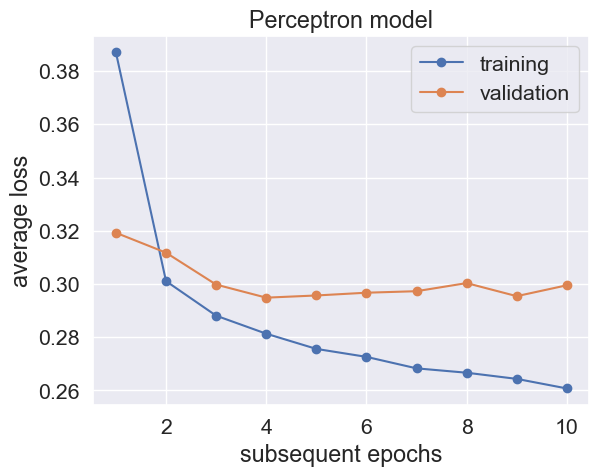

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Perceptron().to(device)

optimizer = optim.SGD(model.parameters(), lr=model_args['lr'], momentum=model_args['momentum'])
#optimizer = optim.Adadelta(model.parameters(), lr=model_args['lr'])

torch.manual_seed(model_args['seed'])
train_loss = []
validation_loss = []
for epoch_number in range(1, model_args['epochs'] + 1):
    train_loss.append(train(model, device, train_loader, optimizer, epoch_number))
    validation_loss.append(test(model, device, validation_loader, 'Validation set'))

test(model, device, test_loader, 'Test set')
plot_loss(train_loss, validation_loss, 'Perceptron model')

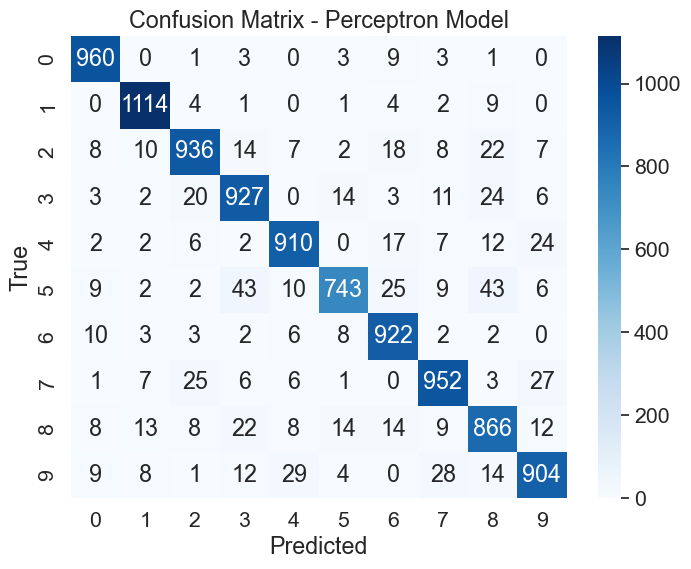

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load test data
test_loader = torch.utils.data.DataLoader(test_subset, batch_size=1000, shuffle=False)

# Evaluate deep model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute confusion matrix
cm_deep = confusion_matrix(y_true, y_pred)

# Plot confusion matrix for deep model
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm_deep, annot=True, fmt='g', cmap='Blues', xticklabels=np.arange(0,10), yticklabels=np.arange(0,10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Perceptron Model')
plt.show()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.304700
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.098596
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.803591
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.590582

Train set: Average loss: 1.2132
Validation set: Average loss: 0.3343, Accuracy: 9039/10000 (90%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.505174
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.277490
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.311899
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.170761

Train set: Average loss: 0.3214
Validation set: Average loss: 0.1964, Accuracy: 9445/10000 (94%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.310246
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.361143
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.278192
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.209251

Train set: Average loss: 0.2297
Validation set: Average loss: 0.1579, Accuracy: 9542/10000 (95%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.322616
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.274846
Train Epoch: 4 [25600/5

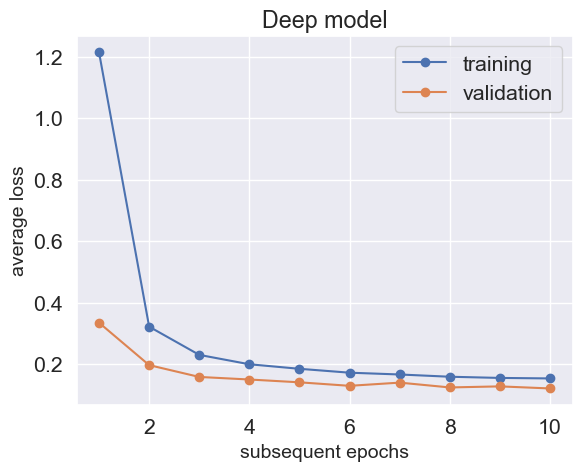

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Deep().to(device)

optimizer = optim.SGD(model.parameters(), 
                      lr=model_args['lr'], 
                      momentum=model_args['momentum'],
                      weight_decay=1.e-2)
#optimizer = optim.Adadelta(model.parameters(), lr=model_args['lr'])

torch.manual_seed(model_args['seed'])
train_loss = []
validation_loss = []
for epoch_number in range(1, model_args['epochs'] + 1):
    train_loss.append(train(model, device, train_loader, optimizer, epoch_number))
    validation_loss.append(test(model, device, validation_loader, 'Validation set'))

test(model, device, test_loader, 'Test set')
plot_loss(train_loss, validation_loss, 'Deep model')

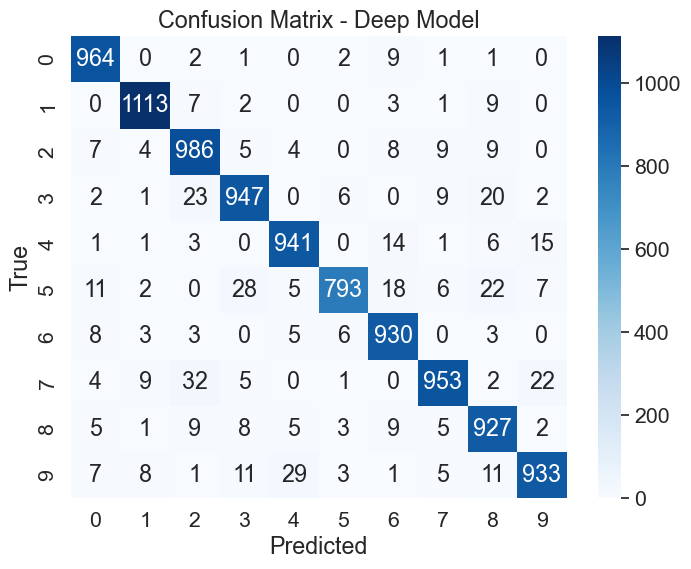

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load test data
test_loader = torch.utils.data.DataLoader(test_subset, batch_size=1000, shuffle=False)

# Evaluate deep model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute confusion matrix
cm_deep = confusion_matrix(y_true, y_pred)

# Plot confusion matrix for deep model
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm_deep, annot=True, fmt='g', cmap='Blues', xticklabels=np.arange(0,10), yticklabels=np.arange(0,10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Deep Model')
plt.show()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.317641
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.192663
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.512488
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.298007

Train set: Average loss: 0.8737
Validation set: Average loss: 0.1701, Accuracy: 9548/10000 (95%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.291135
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.244277
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.130176
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.171568

Train set: Average loss: 0.2039
Validation set: Average loss: 0.1006, Accuracy: 9707/10000 (97%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.103571
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.116913
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.147092
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.157978

Train set: Average loss: 0.1372
Validation set: Average loss: 0.0707, Accuracy: 9785/10000 (98%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.135026
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.078075
Train Epoch: 4 [25600/5

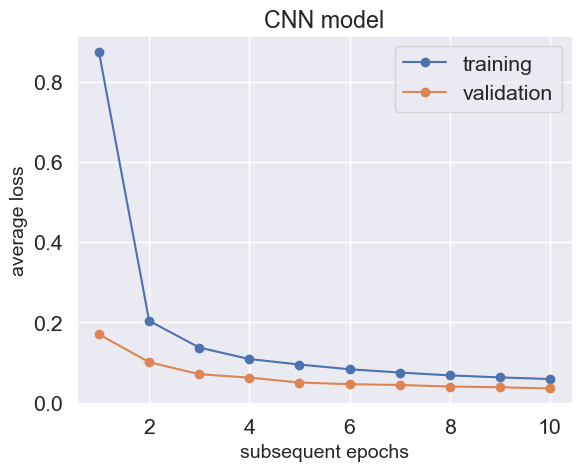

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN().to(device)

optimizer = optim.SGD(model.parameters(), lr=model_args['lr'], momentum=model_args['momentum'])
#optimizer = optim.Adadelta(model.parameters(), lr=model_args['lr'])

torch.manual_seed(model_args['seed'])
train_loss = []
validation_loss = []
for epoch_number in range(1, model_args['epochs'] + 1):
    train_loss.append(train(model, device, train_loader, optimizer, epoch_number))
    validation_loss.append(test(model, device, validation_loader, 'Validation set'))

test(model, device, test_loader, 'Test set')
plot_loss(train_loss, validation_loss, 'CNN model')

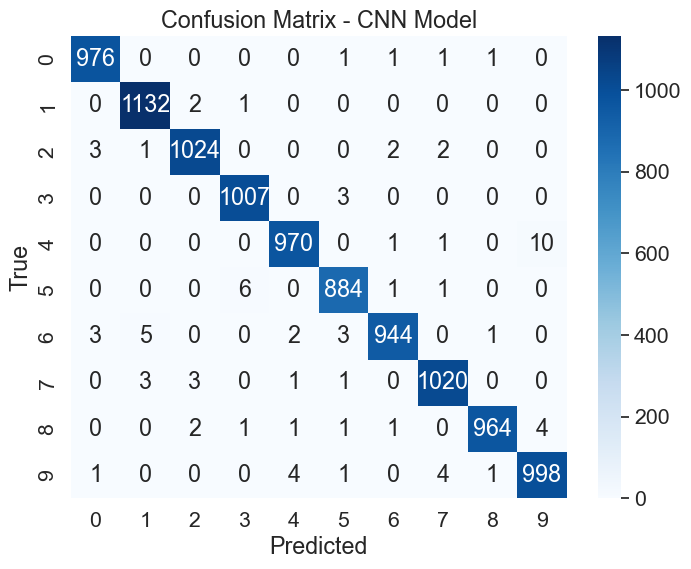

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load test data
test_loader = torch.utils.data.DataLoader(test_subset, batch_size=1000, shuffle=False)

# Evaluate deep model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute confusion matrix
cm_deep = confusion_matrix(y_true, y_pred)

# Plot confusion matrix for deep model
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm_deep, annot=True, fmt='g', cmap='Blues', xticklabels=np.arange(0,10), yticklabels=np.arange(0,10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CNN Model')
plt.show()